<a href="https://colab.research.google.com/github/erzar0/engineering-thesis/blob/main/data_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

npz = np.load('/content/drive/MyDrive/thesis/Blank_PcbCu/GEM_Cr_PBS1_Blank_PcbCu_ArCO2_75_25_Gain_35_Thr_35_HV_3640_Xray_50kV_04mA_part_001_GainCorr.pcap.dat.npz', allow_pickle=True)
copper_plate_e_xy = npz["E_xy"]

npz = np.load('/content/drive/MyDrive/thesis/Gasecki/Gasecki_data_corr_total.npz', allow_pickle=True)
gasecki_e_xy = npz["E_xy"]

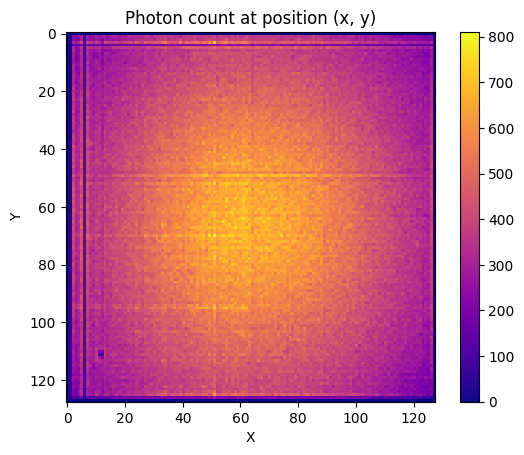

Mean photon count: 424.95355224609375
Standard deviation of photon count: 143.14790594655412


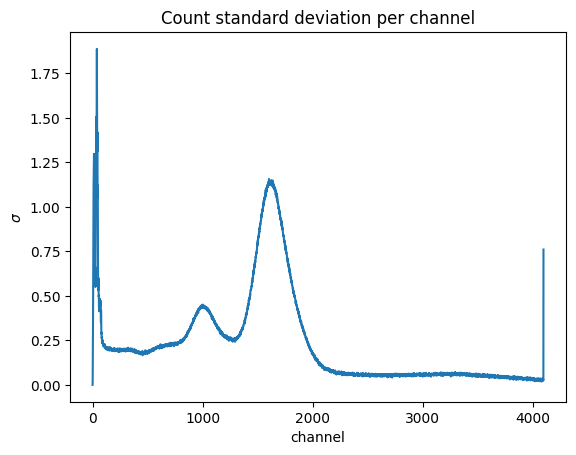

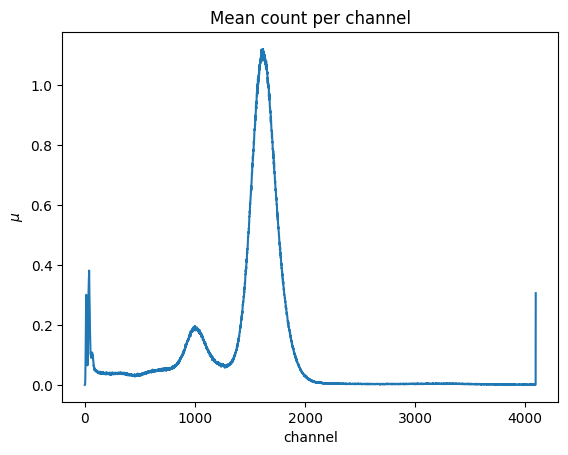

In [ ]:
import matplotlib.pyplot as plt
import random

copper_plate_photon_count = np.sum(copper_plate_e_xy, axis=-1)

plt.figure(random.randint(1, 10e10))
plt.imshow(copper_plate_photon_count, cmap='plasma', interpolation='nearest')
plt.colorbar()
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Photon count at position (x, y)")
plt.show()

print("Mean photon count: {}".format(np.mean(copper_plate_photon_count)))
print("Standard deviation of photon count: {}".format(np.var(copper_plate_photon_count)**0.5))

copper_plate_channel_std_dev = np.var(copper_plate_e_xy, axis=(0, 1))**0.5
plt.figure(random.randint(1, 10e10))
plt.xlabel("channel")
plt.ylabel(r"$\sigma$")
plt.title("Count standard deviation per channel")
plt.plot(copper_plate_channel_std_dev)

copper_plate_channel_mean = np.mean(copper_plate_e_xy, axis=(0, 1))
plt.figure(random.randint(1, 10e10))
plt.xlabel("channel")
plt.ylabel(r"$\mu$")
plt.title("Mean count per channel")
plt.plot(copper_plate_channel_mean)

In [ ]:
!pip install minisom

  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.1-py3-none-any.whl size=10589 sha256=cfae0e9546e45e23c173f5c425ac8a8739bb608f2ab87544cdb8aa0a5468e8ee
  Stored in directory: /root/.cache/pip/wheels/c7/92/d2/33bbda5f86fd8830510b16aa98c8dd420129b5cb24248fd6db
Successfully built minisom


In [ ]:
from minisom import MiniSom

gasecki = gasecki_e_xy.reshape(-1, 4094)
gasecki_max_channel_counts = np.max(np.abs(gasecki), axis=1, keepdims=True)
gasecki_flat = gasecki / gasecki_max_channel_counts

som = MiniSom(3, 3, gasecki_flat.shape[-1])


In [ ]:
som.train(gasecki_flat, 100) # trains the SOM with 100 iterations

In [ ]:
som.winner(gasecki[64, 80])
gasecki_results = [[som.winner(gasecki[i, j]) for j in range(gasecki.shape[1])] for i in range(gasecki.shape[0])]

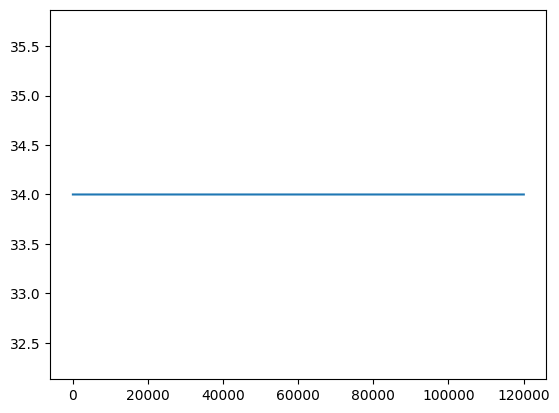

In [ ]:
plt.plot(pred)